# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    ray_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1, 1.4, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/roullete/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=RouletteWheelSelectionFilter(roulette_pointer_count=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.725 and x[1] >= 0.725,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=500,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[circular_params, corn_params, grid_params],
        shape_gene_pool=[
            ray_params
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/roullete/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 500
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: RouletteWheelSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roullete/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roullete/config/biased_fitness

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[Storage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roullete/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roullete/config/biased_fitness_evolution.json
[PopulationStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roullete/config/population.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roullete/config/fitness.json
----------------------------------------------------------------------------------------------------
>> Generation: 35, Population: 348, Unique population: 80, Should Stop: False
----------------------------------------------------------------------------------------------------
[PopulationStorage]: JSON d

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

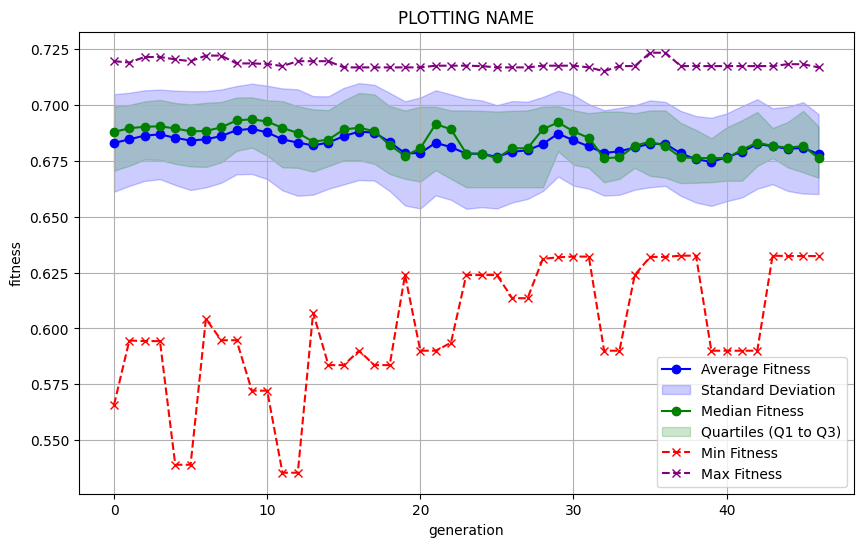

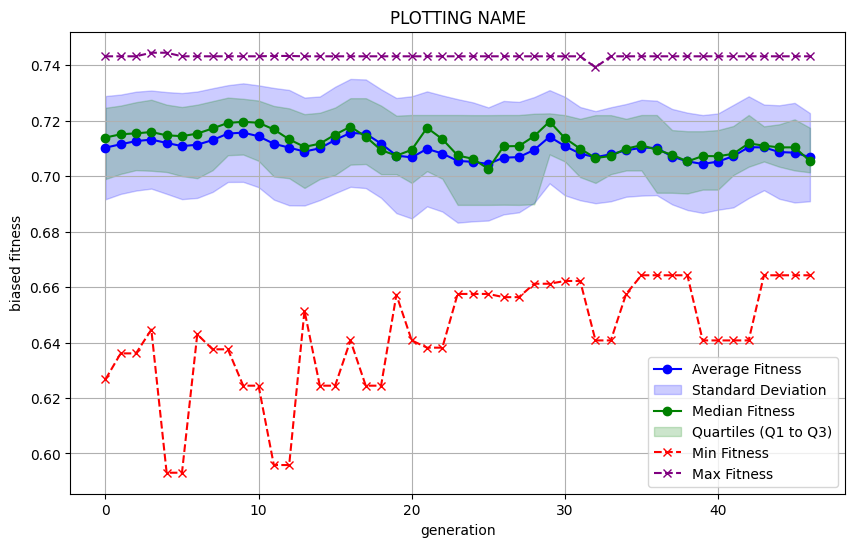

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_375: ['RayShape_253', 'CircularStrictTransformation_64']
predict: (0.29276787093364964, 373.4332648999999, 457.93256379999997)
biased_fitness: 0.692423308763504, fitness: 0.665492147163504
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.8386134388880406, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ di: 8.70193165251676, dx: 7.771021279934098, phi: 0.5711986642890533, ]


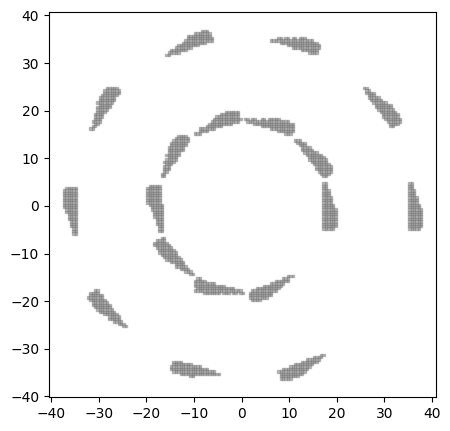

--------------------------------------------------
label: VentHole Chromosome_183: ['RayShape_375', 'CircularStrictTransformation_432']
predict: (0.2920696171632726, 373.47564079999984, 456.7891989)
biased_fitness: 0.7013959449672748, fitness: 0.6779796298672746
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.8386134388880406, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ di: 8.697987490613567, dx: 7.771021279934098, phi: 0.5711986642890533, ]


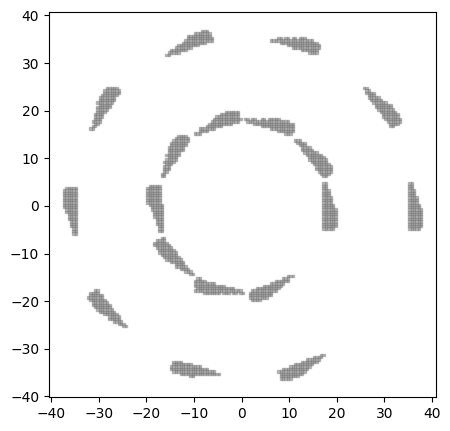

--------------------------------------------------
label: VentHole Chromosome_217: ['RayShape_183', 'GridStrictTransformation_432']
predict: (0.290467070556915, 372.4191430999999, 456.0396397000001)
biased_fitness: 0.72631601333085, fitness: 0.7030353804308496
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.8386134388880406, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ dx: 4.909046381768536, dy: 7.584551888302596, ]


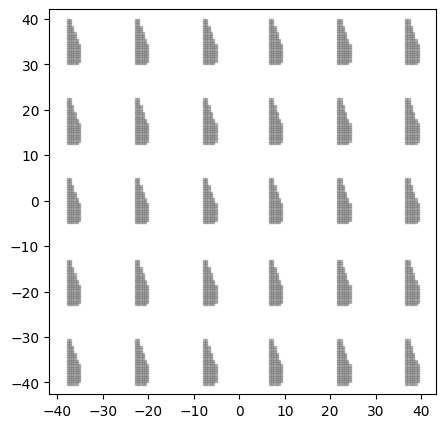

--------------------------------------------------
label: VentHole Chromosome_432: ['RayShape_375', 'GridStrictTransformation_217']
predict: (0.2912608596488546, 373.46577069999984, 457.6884527999999)
biased_fitness: 0.707754103011455, fitness: 0.6816202860114551
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ dx: 4.909046381768536, dy: 7.584551888302596, ]


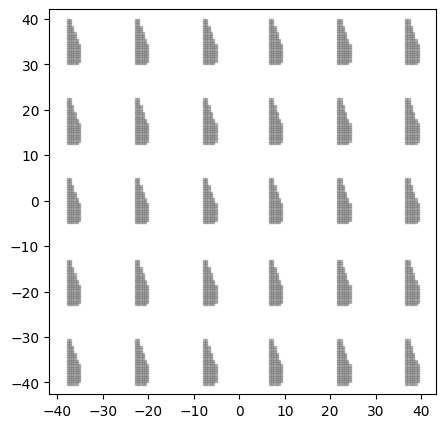

--------------------------------------------------
label: VentHole Chromosome_203: ['RayShape_432', 'CircularStrictTransformation_193']
predict: (0.29208062892206166, 373.06225920000014, 457.6603433999998)
biased_fitness: 0.7024372095793827, fitness: 0.6755806977793836
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ di: 12.967904361132309, dx: 7.771021279934098, phi: 0.5711986642890533, ]


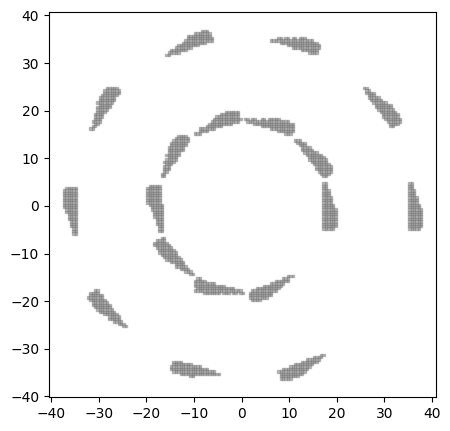

--------------------------------------------------
label: VentHole Chromosome_162: ['RayShape_203', 'GridStrictTransformation_64']
predict: (0.2933015161478334, 373.98048159999985, 460.1940127999999)
biased_fitness: 0.678733441721667, fitness: 0.6461123665216673
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ dx: 4.909046381768536, dy: 7.584551888302596, ]


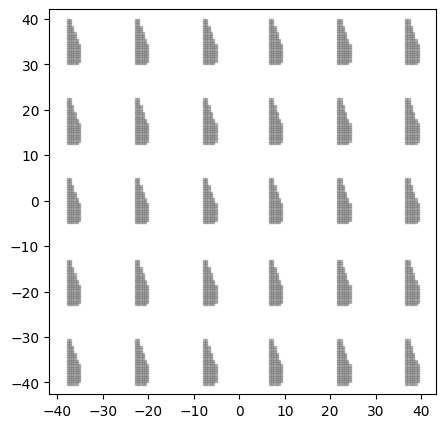

--------------------------------------------------
label: VentHole Chromosome_432: ['RayShape_183', 'CircularStrictTransformation_64']
predict: (0.2899482001454572, 372.97417040000005, 458.17730219999993)
biased_fitness: 0.7233442013454278, fitness: 0.6947606355454281
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ di: 8.697987490613567, dx: 7.771021279934098, phi: 0.5711986642890533, ]


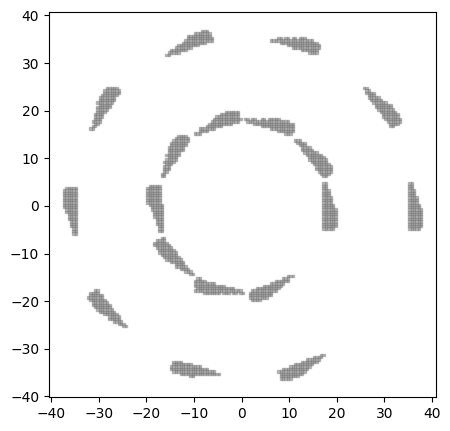

--------------------------------------------------
label: VentHole Chromosome_64: ['RayShape_39', 'CircularStrictTransformation_203']
predict: (0.2905898208457196, 373.5063029000001, 460.0612668999997)
biased_fitness: 0.7094351374428038, fitness: 0.676263942542805
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.1709423055570067, ]
pattern parameter:
parameter_list: [ di: 12.967904361132309, dx: 7.771021279934098, phi: 0.5711986642890533, ]


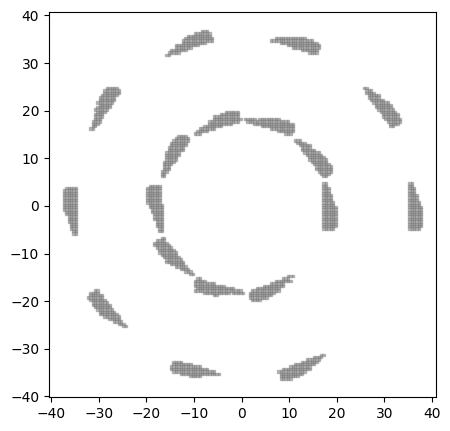

--------------------------------------------------
label: VentHole Chromosome_75: ['RayShape_162', 'CircularStrictTransformation_193']
predict: (0.2916059370805115, 373.05314899999996, 460.23791099999966)
biased_fitness: 0.7020927641948854, fitness: 0.6674853291948865
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ di: 8.697987490613567, dx: 7.771021279934098, phi: 0.5711986642890533, ]


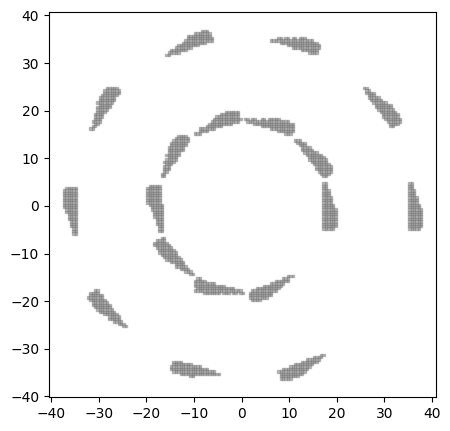

--------------------------------------------------
label: VentHole Chromosome_39: ['RayShape_64', 'GridStrictTransformation_193']
predict: (0.28840218427326736, 373.11604559999995, 457.4551934000002)
biased_fitness: 0.7392554512673262, fitness: 0.7131219622673255
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ dx: 4.909046381768536, dy: 7.584551888302596, ]


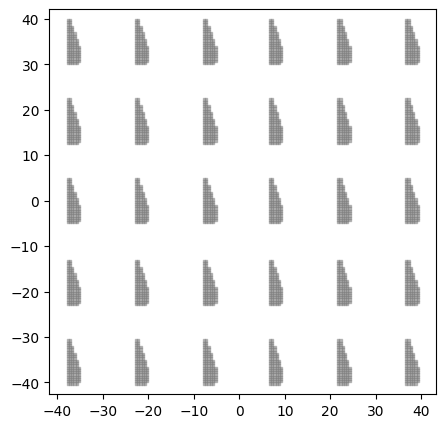

--------------------------------------------------
label: VentHole Chromosome_432: ['RayShape_39', 'CircularStrictTransformation_183']
predict: (0.2919761516426924, 373.52973470000006, 460.74075020000004)
biased_fitness: 0.6940488402730751, fitness: 0.6588860590730753
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ di: 8.697987490613567, dx: 7.771021279934098, phi: 0.5711986642890533, ]


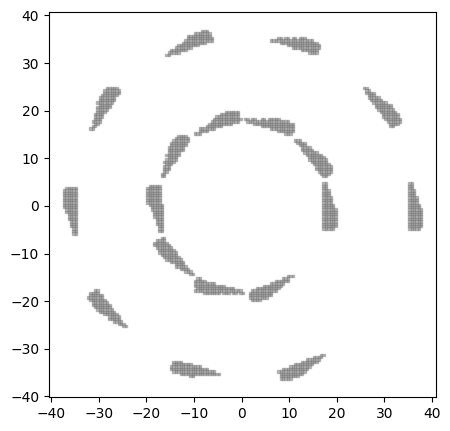

--------------------------------------------------
label: VentHole Chromosome_375: ['RayShape_432', 'CircularStrictTransformation_193']
predict: (0.2916059370805115, 373.05314899999996, 460.23791099999966)
biased_fitness: 0.7020927641948854, fitness: 0.6674853291948865
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ di: 12.967904361132309, dx: 7.771021279934098, phi: 0.5711986642890533, ]


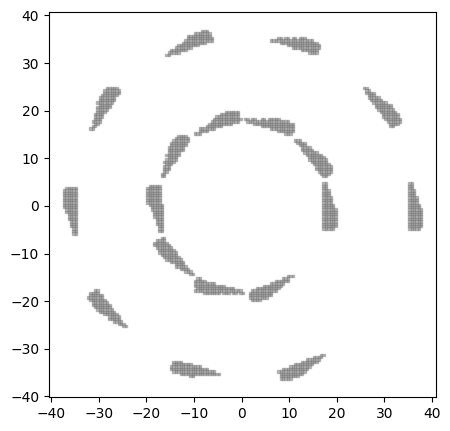

--------------------------------------------------
label: VentHole Chromosome_75: ['RayShape_193', 'GridStrictTransformation_183']
predict: (0.2884933870926969, 372.6663278999998, 457.05360570000005)
biased_fitness: 0.742294622373032, fitness: 0.7164664610730316
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ dx: 4.909046381768536, dy: 3.6923393135981604, ]


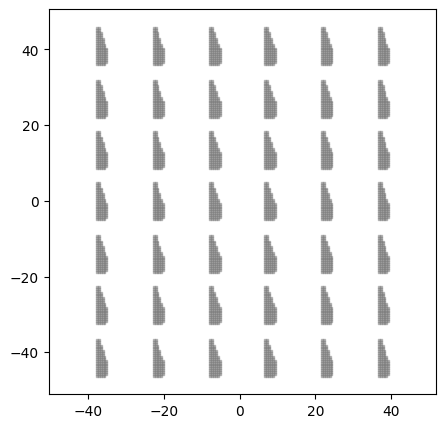

--------------------------------------------------
label: VentHole Chromosome_75: ['RayShape_375', 'CornerTransformation_39']
predict: (0.28889672844424874, 373.32026819999993, 456.6328832)
biased_fitness: 0.734525071757513, fitness: 0.711266958557513
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.8386134388880406, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ di: 9.257474510574085, dx: 6.845034227577003, phi: 0.27630315253348964, rot_count: 2.0, ]


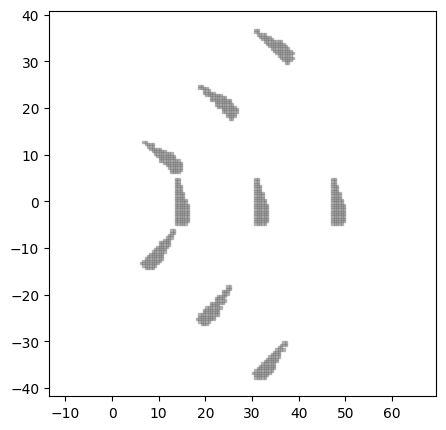

--------------------------------------------------
label: VentHole Chromosome_39: ['RayShape_39', 'CornerTransformation_75']
predict: (0.2907070586571474, 373.27239549999996, 456.4924089)
biased_fitness: 0.7170378271285262, fitness: 0.6941053914285261
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ di: 9.257474510574085, dx: 6.845034227577003, phi: 0.27630315253348964, rot_count: 2.0, ]


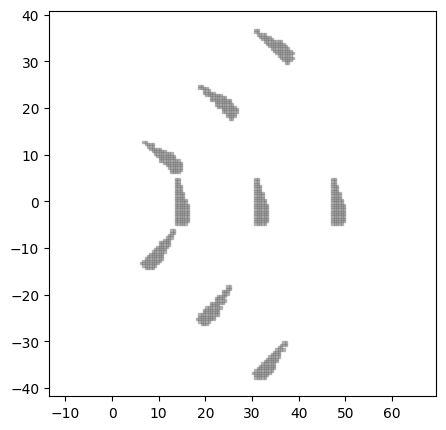

--------------------------------------------------
label: VentHole Chromosome_375: ['RayShape_432', 'CircularStrictTransformation_39']
predict: (0.2896170030119496, 373.2052923, 458.2108767999998)
biased_fitness: 0.7249711701805043, fitness: 0.6967491243805048
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ di: 8.70193165251676, dx: 7.771021279934098, phi: 0.5711986642890533, ]


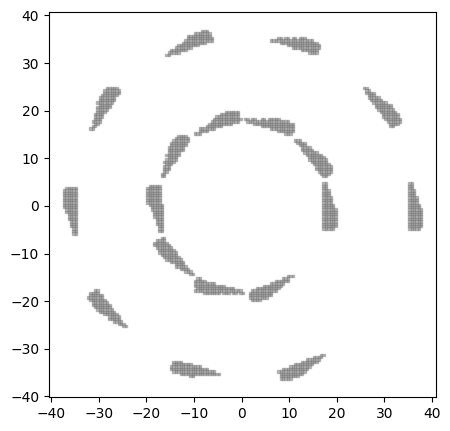

--------------------------------------------------
label: VentHole Chromosome_39: ['RayShape_64', 'GridStrictTransformation_75']
predict: (0.29483134033302827, 373.4901260999999, 459.54327129999996)
biased_fitness: 0.6681691713697181, fitness: 0.636519609669718
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.4148687222923424, ]
pattern parameter:
parameter_list: [ dx: 4.909046381768536, dy: 3.6923393135981604, ]


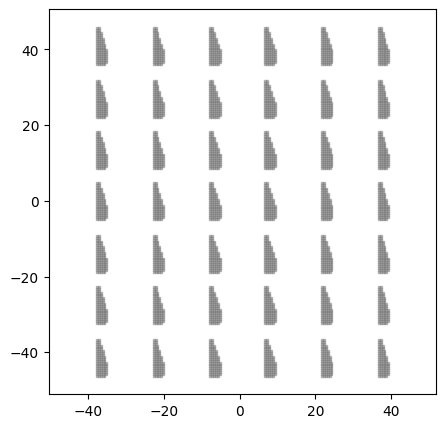

--------------------------------------------------
label: VentHole Chromosome_229: ['RayShape_375', 'GridStrictTransformation_162']
predict: (0.29277039509700487, 372.94193229999996, 456.3462973999998)
biased_fitness: 0.6990099281299519, fitness: 0.6758549005299525
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ dx: 4.909046381768536, dy: 7.584551888302596, ]


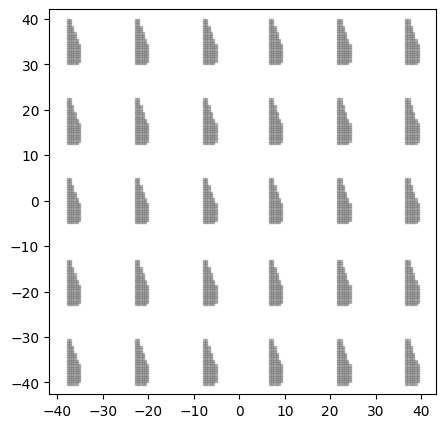

--------------------------------------------------
label: VentHole Chromosome_282: ['RayShape_229', 'GridStrictTransformation_253']
predict: (0.29316054661194446, 373.9564392999999, 460.7079157)
biased_fitness: 0.679283627380556, fitness: 0.6450727588805558
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ dx: 4.909046381768536, dy: 3.6923393135981604, ]


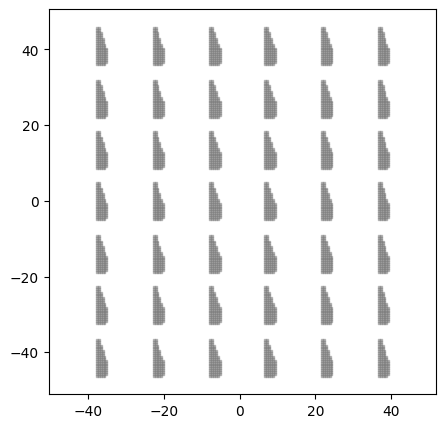

--------------------------------------------------
label: VentHole Chromosome_64: ['RayShape_75', 'GridStrictTransformation_375']
predict: (0.29077299547092794, 373.32025909999976, 459.00283899999994)
biased_fitness: 0.7110225535907223, fitness: 0.680654554790722
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.8386134388880406, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ dx: 4.909046381768536, dy: 7.584551888302596, ]


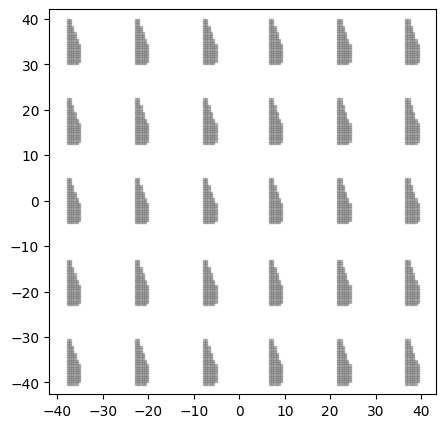

--------------------------------------------------
label: VentHole Chromosome_193: ['RayShape_64', 'CircularStrictTransformation_432']
predict: (0.2905898208457196, 373.5063029000001, 460.0612668999997)
biased_fitness: 0.7094351374428038, fitness: 0.676263942542805
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.8386134388880406, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ di: 12.967904361132309, dx: 7.771021279934098, phi: 0.5711986642890533, ]


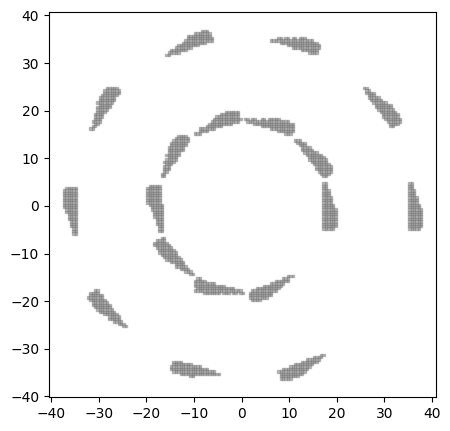

--------------------------------------------------
label: VentHole Chromosome_183: ['RayShape_375', 'GridStrictTransformation_39']
predict: (0.2891180827843838, 372.99681270000013, 457.35390699999994)
biased_fitness: 0.7331336692561612, fitness: 0.7070655736561617
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.1709423055570067, ]
pattern parameter:
parameter_list: [ dx: 4.909046381768536, dy: 3.6923393135981604, ]


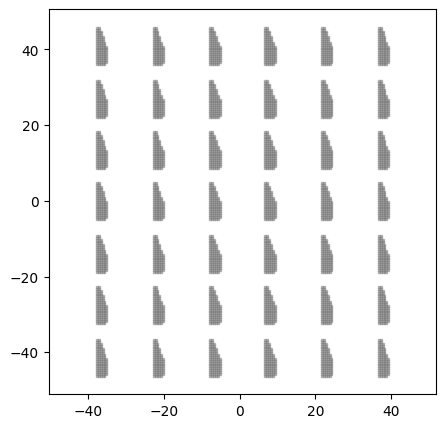

--------------------------------------------------
label: VentHole Chromosome_229: ['RayShape_183', 'GridStrictTransformation_229']
predict: (0.29077299547092794, 373.32025909999976, 459.00283899999994)
biased_fitness: 0.7110225535907223, fitness: 0.680654554790722
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.1709423055570067, ]
pattern parameter:
parameter_list: [ dx: 4.909046381768536, dy: 7.584551888302596, ]


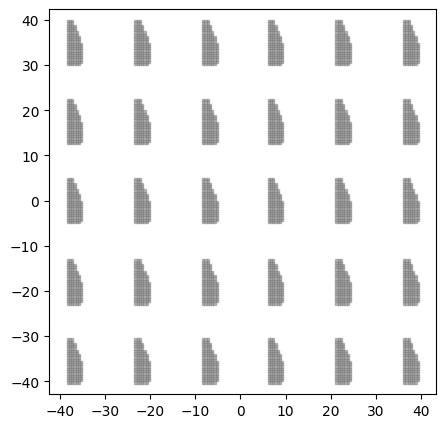

--------------------------------------------------
label: VentHole Chromosome_229: ['RayShape_193', 'CircularStrictTransformation_203']
predict: (0.2905169462946482, 373.2200798, 458.0954026999996)
biased_fitness: 0.7160991730535187, fitness: 0.6882531245535198
shape parameter:
parameter_list: [ upper_slope: 2.3784377359167825, nose_point: 2.774405463843231, lower_coefficient: 2.376900685132094, lower_x-intercept: 2.5717583789534677, lower_y-intercept: 1.4691897147683453, ]
pattern parameter:
parameter_list: [ di: 12.967904361132309, dx: 7.771021279934098, phi: 0.5711986642890533, ]


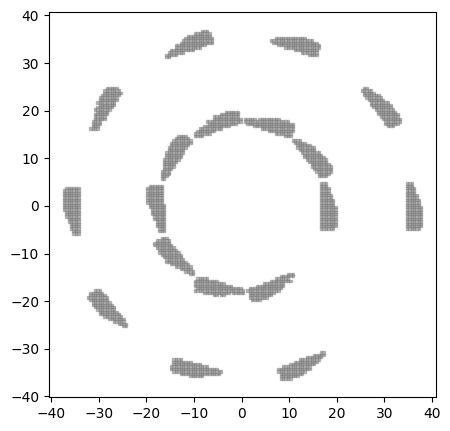

--------------------------------------------------
label: VentHole Chromosome_193: ['RayShape_193', 'CornerTransformation_39']
predict: (0.2903757298963523, 373.3333698, 455.5323053)
biased_fitness: 0.7218445018364769, fitness: 0.7019143255364768
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.1709423055570067, ]
pattern parameter:
parameter_list: [ di: 9.257474510574085, dx: 6.845034227577003, phi: 0.27630315253348964, rot_count: 2.0, ]


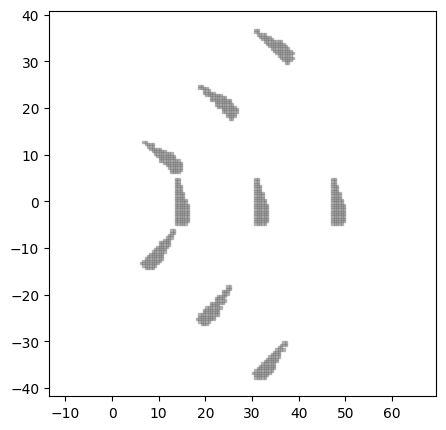

--------------------------------------------------
label: VentHole Chromosome_39: ['RayShape_39', 'GridStrictTransformation_432']
predict: (0.2891656217499492, 373.16410260000004, 456.8960826999999)
biased_fitness: 0.7324028989005078, fitness: 0.7080428560005082
shape parameter:
parameter_list: [ upper_slope: 2.7804466831254553, nose_point: 1.7122415565213231, lower_coefficient: 2.387921270306398, lower_x-intercept: 3.0917654254818308, lower_y-intercept: 1.5162744466736604, ]
pattern parameter:
parameter_list: [ dx: 4.909046381768536, dy: 7.584551888302596, ]


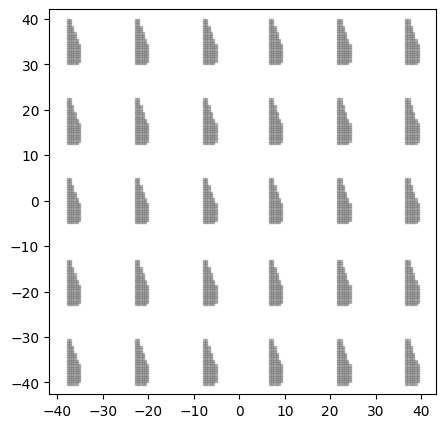

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )